In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib as mpl

In [2]:
from sklearn.datasets import load_digits
digits=load_digits(n_class=10)

In [3]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [5]:
digits['data'][0].reshape(8,8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [6]:
digits['data'][0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [8]:
digits['images'][0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [13]:
digits['target_names'][0:9]

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [14]:
digits['target_names'][0]

0

In [18]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

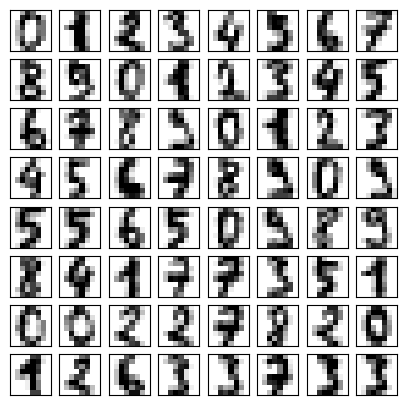

In [23]:
fig,ax=plt.subplots(8,8,figsize=(5,5))
for i,axi in enumerate(ax.flat):
    axi.imshow(digits.images[i],cmap='binary')
    axi.set(xticks=[],yticks=[])


c:\Users\Pc\miniconda3\lib\site-packages\sklearn\manifold\_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
c:\Users\Pc\miniconda3\lib\site-packages\scipy\sparse\_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


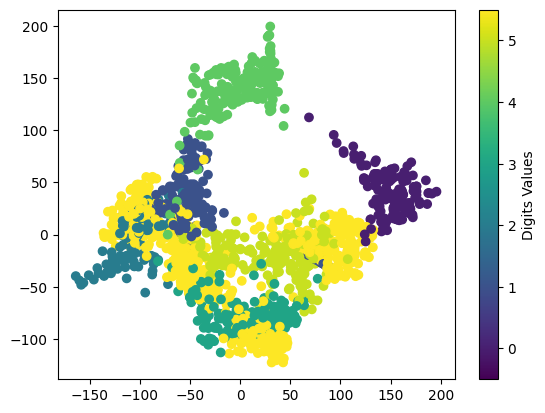

In [28]:
from sklearn.manifold import Isomap
iso=Isomap(n_components=2)
projections=iso.fit_transform(digits.data)
plt.scatter(projections[:,0],projections[:,1],c=digits.target,cmap='viridis')
plt.colorbar(ticks=range(10),label="Digits Values")
plt.clim(-0.5,5.5)

In [29]:
print(projections[:,0][70],projections[:,1][70])

-56.60683580684843 61.950223671174875


In [32]:
def view_digits(index):
    plt.imshow(digits.images[index],cmap=plt.cm.gray_r)
    plt.title("original it is:"+str(digits.target[index]))

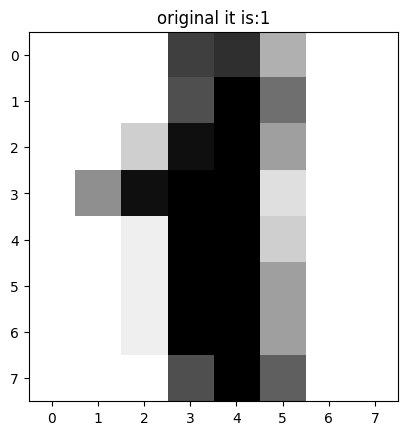

In [36]:
view_digits(1)

In [37]:
main_data=digits['data']
target=digits['target']

In [42]:
from sklearn import svm

svc=svm.SVC(gamma=0.001,C=100)
svc.fit(main_data[:1500],target[:1500])
prediction=svc.predict(main_data[1501:])
list(zip(prediction,target[1501:]))

[(7, 7),
 (4, 4),
 (6, 6),
 (3, 3),
 (1, 1),
 (3, 3),
 (9, 9),
 (1, 1),
 (7, 7),
 (6, 6),
 (8, 8),
 (4, 4),
 (3, 3),
 (1, 1),
 (4, 4),
 (0, 0),
 (5, 5),
 (3, 3),
 (6, 6),
 (9, 9),
 (6, 6),
 (1, 1),
 (7, 7),
 (5, 5),
 (4, 4),
 (4, 4),
 (7, 7),
 (2, 2),
 (8, 8),
 (2, 2),
 (2, 2),
 (5, 5),
 (7, 7),
 (9, 9),
 (5, 5),
 (4, 4),
 (8, 8),
 (8, 8),
 (4, 4),
 (9, 9),
 (0, 0),
 (8, 8),
 (9, 9),
 (8, 8),
 (0, 0),
 (1, 1),
 (2, 2),
 (3, 3),
 (4, 4),
 (5, 5),
 (6, 6),
 (7, 7),
 (1, 8),
 (9, 9),
 (0, 0),
 (1, 1),
 (2, 2),
 (3, 3),
 (4, 4),
 (5, 5),
 (6, 6),
 (9, 9),
 (0, 0),
 (1, 1),
 (2, 2),
 (3, 3),
 (4, 4),
 (5, 5),
 (6, 6),
 (7, 7),
 (1, 8),
 (9, 9),
 (4, 0),
 (9, 9),
 (5, 5),
 (5, 5),
 (6, 6),
 (5, 5),
 (0, 0),
 (9, 9),
 (8, 8),
 (9, 9),
 (8, 8),
 (4, 4),
 (1, 1),
 (7, 7),
 (7, 7),
 (3, 3),
 (5, 5),
 (1, 1),
 (0, 0),
 (0, 0),
 (2, 2),
 (2, 2),
 (7, 7),
 (8, 8),
 (2, 2),
 (0, 0),
 (1, 1),
 (2, 2),
 (6, 6),
 (8, 3),
 (3, 3),
 (7, 7),
 (3, 3),
 (3, 3),
 (4, 4),
 (6, 6),
 (6, 6),
 (6, 6),
 (9, 4),
 

<Axes: >

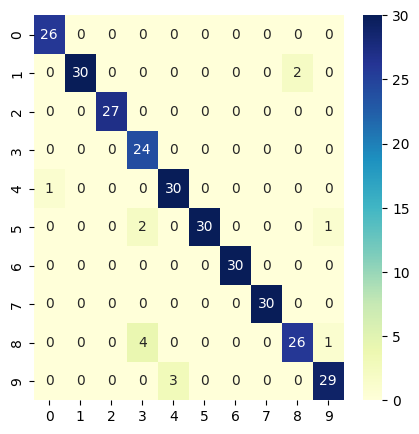

In [47]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm=confusion_matrix(prediction,target[1501:])
conf_matrix=pd.DataFrame(data=cm)
plt.figure(figsize= (5,5))
sns.heatmap(conf_matrix, annot = True,fmt='d',cmap="YlGnBu" )

In [48]:
cm

array([[26,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 30,  0,  0,  0,  0,  0,  0,  2,  0],
       [ 0,  0, 27,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 24,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0, 30,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  2,  0, 30,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 30,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 30,  0,  0],
       [ 0,  0,  0,  4,  0,  0,  0,  0, 26,  1],
       [ 0,  0,  0,  0,  3,  0,  0,  0,  0, 29]], dtype=int64)

In [50]:
from sklearn.metrics import classification_report
print(classification_report(prediction,target[1501:]))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        26
           1       1.00      0.94      0.97        32
           2       1.00      1.00      1.00        27
           3       0.80      1.00      0.89        24
           4       0.91      0.97      0.94        31
           5       1.00      0.91      0.95        33
           6       1.00      1.00      1.00        30
           7       1.00      1.00      1.00        30
           8       0.93      0.84      0.88        31
           9       0.94      0.91      0.92        32

    accuracy                           0.95       296
   macro avg       0.95      0.96      0.95       296
weighted avg       0.96      0.95      0.95       296

